## Alcohol and Life Expectation
data source: https://www.kaggle.com/datasets/thedevastator/relationship-between-alcohol-consumption-and-lif?select=lifeexpectancy-verbose.csv
#### Research Questions
1. Examining the relationship between income group and total litres of pure alcohol consumption
2. Analyzing the correlation between life expectancy, beer, spirit, and wine servings
3. Understanding the differences in total litres of pure alcohol consumption across regions, countries, sexes and years

In [629]:
# Importing relevant library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [585]:
# loading data
df_life_expectancy = pd.read_csv('lifeexpectancy-verbose.csv')
df_drink = pd.read_csv('drinks.csv')

# Creating a copy of our dataframes
df_life = df_life_expectancy.copy()
df_drinks = df_drink.copy()

In [586]:
df_life.head()

,index,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,AMR,Americas,WB_LMI,Lower_middle_income,NIC,Nicaragua,MLE,Male,68,68.0
1,1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_HI,High_income,IRL,Ireland,MLE,Male,69,69.3
2,2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,YEM,Yemen,BTSX,Both sexes,61,61.0
3,3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,AFR,Africa,WB_LMI,Lower_middle_income,NGA,Nigeria,FMLE,Female,48,48.0
4,4,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,SEAR,South_East Asia,WB_LMI,Lower_middle_income,THA,Thailand,FMLE,Female,19,19.0


In [587]:
df_drinks.head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,Afghanistan,0,0,0,0.0
1,1,Albania,89,132,54,4.9
2,2,Algeria,25,0,14,0.7
3,3,Andorra,245,138,312,12.4
4,4,Angola,217,57,45,5.9


### Issues
1. Missing values in both tables
2. South sudan isnt represented in the drink table
3. Same countries are spelt differently in the two table



In [588]:
# Sorting both data frames by country to help sort the country column
df_life = df_life.sort_values(['CountryDisplay', 'YearDisplay'])
df_drinks = df_drinks.sort_values('country')

In [589]:
#checking shape of the data frame
print(df_life.shape)

# removing all null values
df_life = df_life.dropna()

#checking new shape of the data frame
df_life.shape

(6408, 17)


(5244, 17)

In [590]:
# Checking unique countries in the dataframe
df_life.CountryDisplay.nunique(), df_drinks.country.nunique()

(194, 193)

In [591]:
#We should remove "South Sudan" as we don't have "drinks" data.
df_life = df_life[df_life.CountryDisplay != 'South Sudan']

In [592]:
# Confirming the deletion of South sudan from the df_life dataframe
df_life.CountryDisplay.nunique(), df_drinks.country.nunique()

(193, 193)

In [593]:
# to check number of countries in the df_drink dataframe
y = list(df_drinks.country)
len(y)

193

In [594]:
# to check number of countries in the df_life dataframe
x = list(df_life.CountryDisplay.unique())
len(x)

193

In [595]:
# Iterating through the country column to find countries coomonly and uncommonly spelt
country = []
country_misspelt = []

for i in x:
    if i in y:
        country.append(i)
    else:
        country_misspelt.append(i)

In [596]:
country_misspelt

['Antigua and Barbuda',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Brunei Darussalam',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Guinea_Bissau',
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Syrian Arab Republic',
 'The former Yugoslav republic of Macedonia',
 'Timor_Leste',
 'Trinidad and Tobago',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [597]:
# Creating a dictionary for countries not commonly spelt
country_misspelt_dict = {
    'Antigua and Barbuda': 'Antigua & Barbuda', 
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina', 
    'Brunei Darussalam': 'Brunei', 
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Democratic People's Republic of Korea": 'South Korea',
    'Democratic Republic of the Congo': 'DR Congo', 
    'Guinea_Bissau': 'Guinea-Bissau',
    'Iran (Islamic Republic of)': 'Iran', 
    "Lao People's Democratic Republic": 'Laos',
    'Micronesia (Federated States of)': 'Micronesia', 
    'Republic of Korea': 'North Korea',
    'Republic of Moldova': 'Moldova', 
    'Saint Kitts and Nevis': 'St. Kitts & Nevis', 
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent & the Grenadines', 
    'Sao Tome and Principe': 'Sao Tome & Principe', 
    'Syrian Arab Republic': 'Syria',
    'The former Yugoslav republic of Macedonia': 'Macedonia', 
    'Timor_Leste': 'Timor-Leste',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania', 
    'United States of America': 'USA',
    'Venezuela (Bolivarian Republic of)': 'Venezuela', 
    'Viet Nam': 'Vietnam'
}

In [598]:
# Ensuring the country column has commonly spelt country names
df_life = df_life.replace({'CountryDisplay': country_misspelt_dict})

In [599]:
# Dropping columns that arent relevant to our investigation
df = df_life.drop(columns= ['index', 'GhoCode', 'PublishStateCode', 'PublishStateDisplay', 'YearCode', 'RegionCode', 'WorldBankIncomeGroupGroupCode', 'CountryCode', 'SexCode', 'DisplayValue'])

In [600]:
# Checking unique values in all columns
df.nunique()

GhoDisplay                       3
YearDisplay                      4
RegionDisplay                    6
WorldBankIncomeGroupDisplay      4
CountryDisplay                 193
SexDisplay                       3
Numeric                        403
dtype: int64

In [601]:
df.sample(5)

,GhoDisplay,YearDisplay,RegionDisplay,WorldBankIncomeGroupDisplay,CountryDisplay,SexDisplay,Numeric
3651,Life expectancy at age 60 (years),1990,Americas,Upper_middle_income,Suriname,Female,22.0
5402,Healthy life expectancy (HALE) at birth (years),2000,Africa,Upper_middle_income,Seychelles,Both sexes,65.0
2595,Life expectancy at age 60 (years),1990,Eastern Mediterranean,Lower_middle_income,Jordan,Female,18.0
200,Healthy life expectancy (HALE) at birth (years),2013,Africa,Low_income,Kenya,Male,52.1
1989,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Lower_middle_income,Egypt,Both sexes,61.8


In [602]:
df.shape

(5211, 7)

In [603]:
df_drinks.head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,Afghanistan,0,0,0,0.0
1,1,Albania,89,132,54,4.9
2,2,Algeria,25,0,14,0.7
3,3,Andorra,245,138,312,12.4
4,4,Angola,217,57,45,5.9


In [604]:
# Renaming column names for proper communication and dropping the index column
df = df.rename(columns = {'GhoDisplay': 'Global Health Observatory', 'YearDisplay': 'Year ', 'RegionDisplay': 'Region', 'WorldBankIncomeGroupDisplay': 'World Bank Income Group', 'CountryDisplay': 'Country', 'SexDisplay': 'Gender', 'Numeric': 'Life Expectancy Age'})
df_drinks = df_drinks.rename(columns = {'country': 'Country', 'beer_servings': 'Beer Servings', 'spirit_servings': 'Spirit Servings', 'wine_servings': 'Wine Servings', 'total_litres_of_pure_alcohol': 'Total Litres of Pure Alcohol'})
df_drinks = df_drinks.drop(columns = 'index', axis = 1)

In [605]:
df.head()

,Global Health Observatory,Year,Region,World Bank Income Group,Country,Gender,Life Expectancy Age
1935,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,49.0
1951,Life expectancy at age 60 (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Female,15.0
2182,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0
3467,Life expectancy at age 60 (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,14.0
4278,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Male,49.0


In [606]:
# Check if the country_misspelt_dict dictionary works
df[df['Country'] == 'Guinea-Bissau']

,Global Health Observatory,Year,Region,World Bank Income Group,Country,Gender,Life Expectancy Age
2929,Life expectancy at birth (years),1990,Africa,Low_income,Guinea-Bissau,Both sexes,49.0
3184,Life expectancy at age 60 (years),1990,Africa,Low_income,Guinea-Bissau,Female,15.0
3216,Life expectancy at age 60 (years),1990,Africa,Low_income,Guinea-Bissau,Both sexes,14.0
3894,Life expectancy at age 60 (years),1990,Africa,Low_income,Guinea-Bissau,Male,14.0
3899,Life expectancy at birth (years),1990,Africa,Low_income,Guinea-Bissau,Female,52.0
5085,Life expectancy at birth (years),1990,Africa,Low_income,Guinea-Bissau,Male,47.0
897,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Guinea-Bissau,Male,43.2
1741,Life expectancy at birth (years),2000,Africa,Low_income,Guinea-Bissau,Both sexes,52.0
1777,Life expectancy at age 60 (years),2000,Africa,Low_income,Guinea-Bissau,Female,15.0
2779,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Guinea-Bissau,Female,44.6


In [607]:
# merging the two tables with the common column 'Country'
df_final = pd.merge(df, df_drinks, on='Country', how='left')

In [608]:
df_final

,Global Health Observatory,Year,Region,World Bank Income Group,Country,Gender,Life Expectancy Age,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Pure Alcohol
0,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,49.0,0,0,0,0.0
1,Life expectancy at age 60 (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Female,15.0,0,0,0,0.0
2,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0,0,0,0,0.0
3,Life expectancy at age 60 (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,14.0,0,0,0,0.0
4,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Male,49.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5206,Life expectancy at birth (years),2012,Africa,Low_income,Zimbabwe,Male,56.0,64,18,4,4.7
5207,Life expectancy at birth (years),2012,Africa,Low_income,Zimbabwe,Both sexes,58.0,64,18,4,4.7
5208,Healthy life expectancy (HALE) at birth (years),2013,Africa,Low_income,Zimbabwe,Male,47.7,64,18,4,4.7
5209,Healthy life expectancy (HALE) at birth (years),2013,Africa,Low_income,Zimbabwe,Both sexes,49.8,64,18,4,4.7


In [609]:
# checking for record for pure alcohol consumption in Guinea Bissau
df_final[df_final['Country'] == 'Guinea-Bissau']

,Global Health Observatory,Year,Region,World Bank Income Group,Country,Gender,Life Expectancy Age,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Pure Alcohol
1917,Life expectancy at birth (years),1990,Africa,Low_income,Guinea-Bissau,Both sexes,49.0,28,31,21,2.5
1918,Life expectancy at age 60 (years),1990,Africa,Low_income,Guinea-Bissau,Female,15.0,28,31,21,2.5
1919,Life expectancy at age 60 (years),1990,Africa,Low_income,Guinea-Bissau,Both sexes,14.0,28,31,21,2.5
1920,Life expectancy at age 60 (years),1990,Africa,Low_income,Guinea-Bissau,Male,14.0,28,31,21,2.5
1921,Life expectancy at birth (years),1990,Africa,Low_income,Guinea-Bissau,Female,52.0,28,31,21,2.5
1922,Life expectancy at birth (years),1990,Africa,Low_income,Guinea-Bissau,Male,47.0,28,31,21,2.5
1923,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Guinea-Bissau,Male,43.2,28,31,21,2.5
1924,Life expectancy at birth (years),2000,Africa,Low_income,Guinea-Bissau,Both sexes,52.0,28,31,21,2.5
1925,Life expectancy at age 60 (years),2000,Africa,Low_income,Guinea-Bissau,Female,15.0,28,31,21,2.5
1926,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Guinea-Bissau,Female,44.6,28,31,21,2.5


In [610]:
df_final.describe()

,Year,Life Expectancy Age,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Pure Alcohol
count,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000
mean,2003.222222,48.829188,106.160622,80.994819,49.450777,4.717098
std,8.867490,23.087447,100.890414,88.063749,79.498488,3.763871
min,1990.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,21.000000,20.000000,4.000000,1.000000,1.300000
50%,2000.000000,57.600000,76.000000,56.000000,8.000000,4.200000
75%,2012.000000,68.000000,188.000000,128.000000,59.000000,7.200000
max,2013.000000,87.000000,376.000000,438.000000,370.000000,14.400000


In [617]:
df_final.shape

(5211, 11)

In [614]:
df_final.to_csv('Life_Expectation_final.csv')

The correlation coefficient for Life Expectancy vs Beer Servings is:  0.1297759137399287


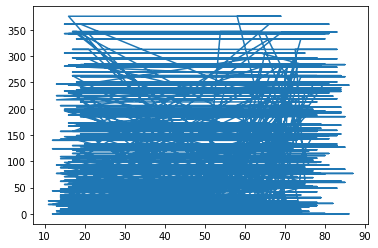

In [639]:
# Checking for correlation between Life Expectancy and Beer Servings
life_expectancy = df_final['Life Expectancy Age']
beer_Servings = df_final['Beer Servings']
spirit_Servings = df_final['Spirit Servings']
wine_Servings = df_final['Wine Servings']

plt.plot(life_expectancy, beer_Servings)
print("The correlation coefficient for Life Expectancy vs Beer Servings is: ", life_expectancy.corr(beer_Servings))

The correlation coefficient for Life Expectancy vs Spirit Servings is:  0.107573134719892


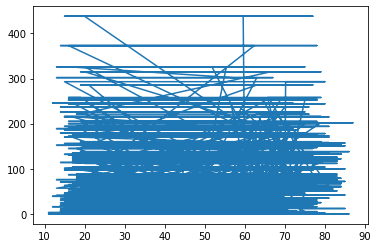

In [640]:
# Checking for correlation between Life Expectancy and Spirit Servings
plt.plot(life_expectancy, spirit_Servings)
print("The correlation coefficient for Life Expectancy vs Spirit Servings is: ", life_expectancy.corr(spirit_Servings))

The correlation coefficient for Life Expectancy vs Wine Servings is:  0.13664765102114004


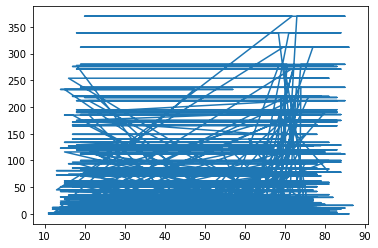

In [641]:
# Checking for correlation between Life Expectancy and Wine Servings
plt.plot(life_expectancy, wine_Servings)
print("The correlation coefficient for Life Expectancy vs Wine Servings is: ", life_expectancy.corr(wine_Servings))

#### Findings
1. The higher the income, The higher the consumption of pure alcohol.
2. Theres no correlation between Life Expectancy, Wine Servings, Spirit Servings and beer serving
3. Pure alcohol was most consumed in 2000 and 2013
4. Belarus, Lithuania and Andorra are top 3 consumers of pure alcohol
5. Pure alcohol is consumed in europe than any other continent.
6. Beer is preffered to wine or spirit